## Analysis:
NOTE : 
To clarify: I'm not asking you to run a supervised learning algorithms. Rather, I'm asking you to see whether the differences in the labels (red/white and quality score) emerge naturally from applying an unsupervised technique to the chemical properties. This should be straightforward to assess using plots.

#### Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines? Present appropriate numerical and/or visual evidence to support your conclusions.

Used K-Means unsuprvised technique.
K = 4, seems to be capable of distinguishing the higher from lower quality wines. 

### Goal : To create unsupervised learning algorithm on wine data to see if it can distinguish the higher from the lower quality wines

### Step 1: Explore the data

In [30]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#import plotly.express as px  # for interative visualizations
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
%pylab inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
#pip install plotly

In [3]:
# read the data
df = pd.read_csv('wine.csv')

In [4]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


###### Distribution of quality :
Most observations have a value of quality rated near 5 and 6.6
The value of higher quality should be somehow above 5 and values of lower quality should be lower than 5, but not too far from the mean (because the standard deviation is around 0.87).



In [12]:
df.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

Text(0.5, 1, 'Heatmap of Correlation Coefficient for Wine Feature Variables')

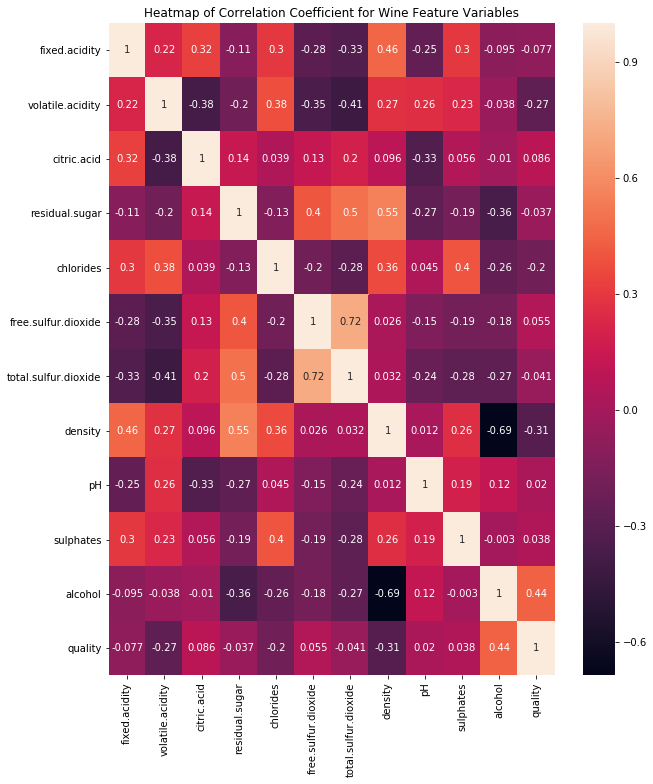

In [16]:
import seaborn as sns

# plot heatmap for feature variables
corr = df.corr()
plt.figure(figsize=[10,12])
sns.heatmap(corr, annot=True)
plt.xticks(rotation=)
plt.title("Heatmap of Correlation Coefficient for Wine Feature Variables", size=12)

### Step 2: Normalize the data and perform clustering : k-means clustering

In [17]:
from sklearn.preprocessing import StandardScaler

In [28]:
# Select the columns for standardization (columns 3 to 37)
selected_columns = df.iloc[:, 0:12]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df_scaled = scaler.fit_transform(selected_columns)

In [22]:
# Extract the centers (means) and scales (standard deviations) from the scaler
mu = scaler.mean_
sigma = scaler.scale_

# 'mu' contains means for each column, 'sigma' contains standard deviations for each column
print("Means: \n", mu)
print("Standard Deviations: \n", sigma)

Means: 
 [7.21530706e+00 3.39666000e-01 3.18633215e-01 5.44323534e+00
 5.60338618e-02 3.05253194e+01 1.15744574e+02 9.94696634e-01
 3.21850085e+00 5.31268278e-01 1.04918008e+01 5.81837771e+00]
Standard Deviations: 
 [1.29633398e+00 1.64623803e-01 1.45306681e-01 4.75743758e+00
 3.50309051e-02 1.77480338e+01 5.65175045e+01 2.99844222e-03
 1.60774828e-01 1.48794421e-01 1.19261996e+00 8.73188064e-01]


###### Picking the right number of clusters : Elbow Plot

Text(0, 0.5, 'Sum of distances of points to closest cluster centers')

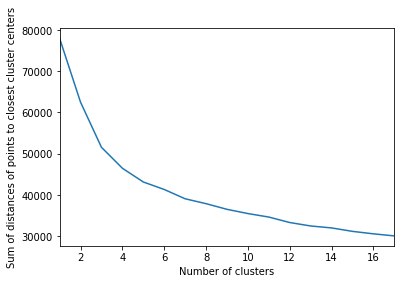

In [31]:
from sklearn.cluster import KMeans

sum_of_distances = {}
for num_clusters in range(1,18):
    kmeans = KMeans(n_clusters=num_clusters, random_state=1)
    kmeans.fit(df_scaled)
    sum_of_distances[num_clusters] = kmeans.inertia_
Series(sum_of_distances).sort_index().plot()
xlabel('Number of clusters')
ylabel('Sum of distances of points to closest cluster centers')

##### Interpretation:
By using this function, we get a plot of optimal number of clusters. As the number of clusters (k) increase, sum of distances of points closest to cluster center decreases.Since, we are interested in clusters that have high and low values of the wine quality, we need to examine which number k (2,3,…) can make the group segmentation more meaningful in terms of wine quality rather than use k that minimizes sum of distances of points closest to cluster center .

### Step 3 : Examine number of clusters = 2,3,4,…,8 to make a decision on K number

#### K = 2

In [32]:
model2 = KMeans(n_clusters=2, random_state=1)
model2.fit(df_scaled)
model2.labels_[:5]

array([0, 0, 0, 0, 0])

In [37]:
print(model2.cluster_centers_)

[[ 0.82041347  1.15883394 -0.33683906 -0.58971357  0.90712156 -0.83245391
  -1.17433482  0.67068494  0.55554032  0.82430903 -0.08642469 -0.28085156]
 [-0.28338159 -0.40027646  0.11634863  0.20369481 -0.3133317   0.28754051
   0.40563067 -0.23166339 -0.19189092 -0.28472716  0.02985222  0.09700981]]


In [33]:
model2.inertia_

62487.48633898404

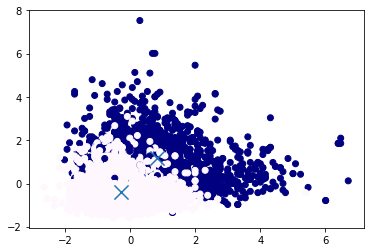

In [35]:
#Plot : No. of clusters = 2
scatter(df_scaled[:,0], df_scaled[:,1], c=model2.labels_, cmap='gist_ncar')
scatter(model2.cluster_centers_[:,0], model2.cluster_centers_[:,1], marker="x", s=200, linewidths=5)

Found K is too small for us to compare the variables between different wine qualities.
We cannot clearly see patterns in the variables since, there are only two groups.

In [40]:
df['Cluster'] = model2.labels_
df['Cluster'].value_counts()
interests = df.columns[0:12]
segment_characteristics = df.groupby('Cluster')[interests].mean()
print(segment_characteristics)

         fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
Cluster                                                                 
0             8.278837          0.530438     0.269688        2.637710   
1             6.847950          0.273771     0.335539        6.412301   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide   density  \
Cluster                                                                   
0         0.087811            15.750899             49.374101  0.996708   
1         0.045058            35.628598            138.669807  0.994002   

               pH  sulphates    alcohol   quality  
Cluster                                            
0        3.307818   0.653921  10.388729  5.573141  
1        3.187650   0.488902  10.527403  5.903086  


When adding K = 2 clusters to original data and examining average values
We find K is too small for us to compare the variables between different wine qualities.

##### K = 8

In [41]:
model8 = KMeans(n_clusters=8, random_state=1)
model8.fit(df_scaled)
model8.labels_[:5]

array([2, 2, 2, 5, 2])

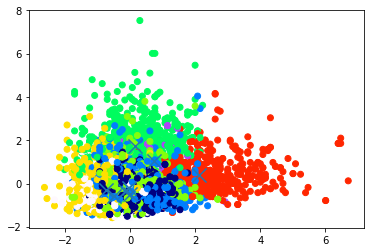

In [42]:
#Plot : No. of clusters = 8
scatter(df_scaled[:,0], df_scaled[:,1], c=model8.labels_, cmap='gist_ncar')
scatter(model8.cluster_centers_[:,0], model8.cluster_centers_[:,1], marker="x", s=200, linewidths=5)

In [43]:
df['Cluster'] = model8.labels_
df['Cluster'].value_counts()
interests = df.columns[0:12]
segment_characteristics = df.groupby('Cluster')[interests].mean()
print(segment_characteristics)

         fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
Cluster                                                                 
0             7.208879          0.263363     0.352886        4.545394   
1             7.165783          0.302523     0.324412        3.425806   
2             7.387031          0.621876     0.137631        2.458467   
3             6.997697          0.280890     0.365848       12.459909   
4             6.235641          0.293701     0.299931        2.890789   
5             9.975215          0.404466     0.463976        2.758692   
6             8.181818          0.512879     0.495758        3.221212   
7             6.553089          0.246670     0.308787        4.475114   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide   density  \
Cluster                                                                   
0         0.036781            31.175361            118.217536  0.991856   
1         0.054233            21.624424     

With K = 8 clusters the differences between quality values are closer to each other harder to distinguish the major difference among variables between different wine qualities.

#### K=9

In [84]:
model4 = KMeans(n_clusters=4, random_state=1)
model4.fit(df_scaled)
model4.labels_[:5]

array([2, 2, 2, 3, 2])

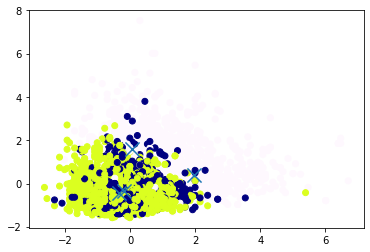

In [85]:
#Plot : No. of clusters = 4
scatter(df_scaled[:,0], df_scaled[:,1], c=model3.labels_, cmap='gist_ncar')
scatter(model4.cluster_centers_[:,0], model4.cluster_centers_[:,1], marker="x", s=200, linewidths=5)

In [86]:
df['Cluster'] = model4.labels_
df['Cluster'].value_counts()
interests = df.columns[0:12]
segment_characteristics = df.groupby('Cluster')[interests].mean()
print(segment_characteristics)

         fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
Cluster                                                                 
0             6.965961          0.282053     0.354483       10.923735   
1             6.767754          0.265132     0.325508        3.418318   
2             7.289118          0.601144     0.143096        2.552158   
3             9.754476          0.406707     0.467678        2.733536   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide   density  \
Cluster                                                                   
0         0.052241            45.161674            169.442665  0.996889   
1         0.040020            29.348731            117.358427  0.992050   
2         0.077987            16.871482             57.270169  0.996070   
3         0.100581            14.676783             45.634294  0.997422   

               pH  sulphates    alcohol   quality  
Cluster                                            
0     

##### As the elbow curve almost flattens after K=8 so, we will keep repeating the process for values of K ranging from 3 to 7.

#### With most of the clusters challenge is clearly relating the change in the variables to the change in quality or a challenge in clearly identifying cluster boundaries (quality means were very close to one another). best K appears to be 4.

### Goal : Run PCA, tSNE, and any clustering algorithm of your choice on the 11 chemical properties (or suitable transformations thereof) and summarize your results. 

### Which dimensionality reduction technique makes the most sense to you for this data? 

### Convince yourself (and me) that your chosen approach is easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties. 

In [87]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
#PCA

In [93]:
dF = pd.read_csv('wine.csv')
dF.columns.values

array(['fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'color'], dtype=object)

In [103]:
# Separate features and labels
features = dF.drop(columns=['color'])
labels = df["color"]

In [96]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [108]:
# Perform PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

In [109]:
loadings_pc1 = pca.components_[0]
loadings_pc1

array([-0.25692873, -0.39493118,  0.14646061,  0.31890519, -0.31344994,
        0.42269137,  0.47441968, -0.09243753, -0.20806957, -0.29985192,
       -0.05892408,  0.08747571])

In [110]:
loadings_pc2 = pca.components_[1]
loadings_pc2

array([ 0.26184306,  0.10519825,  0.14409348,  0.34258497,  0.2697701 ,
        0.11117878,  0.14394753,  0.55492047, -0.15292185,  0.1196342 ,
       -0.49272747, -0.29660091])

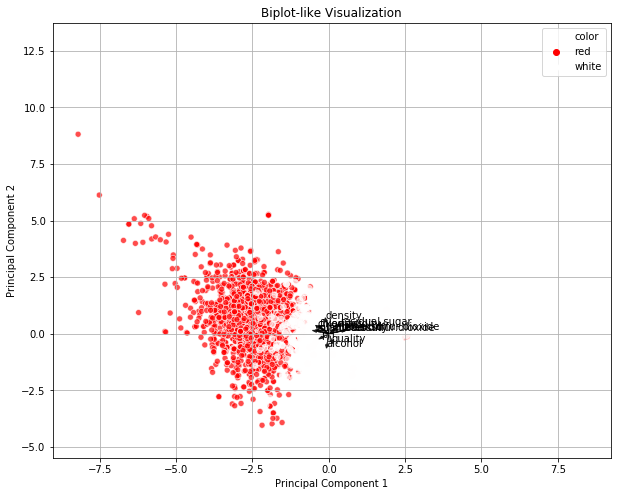

In [111]:
# Plot biplot-like visualization
plt.figure(figsize=(10, 8))

# Scatter plot of PCA scores
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=df["color"], palette=["red", "white"], alpha=0.7)

# Loadings as arrows
for i, feature in enumerate(features.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='black', alpha=0.8, head_width=0.1)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, feature, color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot-like Visualization')
plt.legend()
plt.grid()
plt.show()

In [112]:
sdevs = np.sqrt(pca.explained_variance_)

In [113]:
var = pca.explained_variance_

# Calculate proportion of variance explained (PVE)
pve = var / np.sum(var)

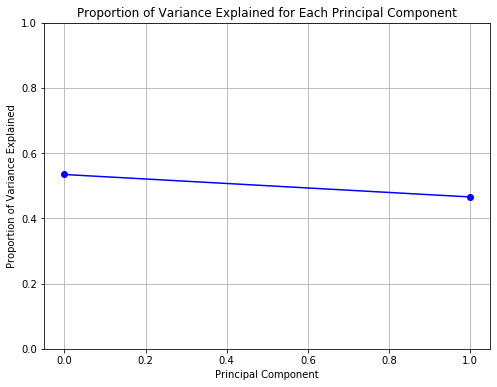

In [114]:
plt.figure(figsize=(8, 6))
plt.plot(pve, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Proportion of Variance Explained for Each Principal Component')
plt.ylim(0, 1)
plt.grid()
plt.show()

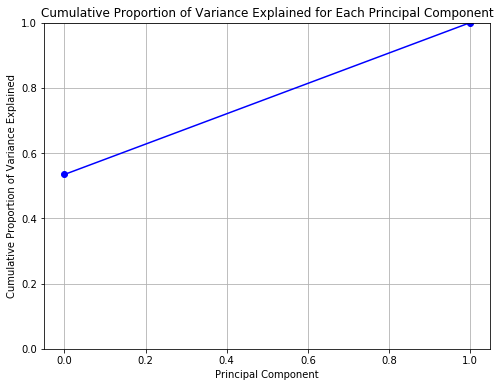

In [115]:
# Calculate cumulative proportion of variance explained (Cumulative PVE)
cumulative_pve = np.cumsum(pve)

# Create a plot of Cumulative PVE
plt.figure(figsize=(8, 6))
plt.plot(cumulative_pve, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative Proportion of Variance Explained for Each Principal Component')
plt.ylim(0, 1)
plt.grid()
plt.show()

In [98]:
# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_tsne = tsne.fit_transform(features_scaled)
features_tsne

Text(0.5, 1.0, 'PCA')

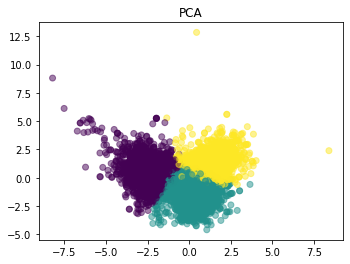

In [101]:
# Visualize PCA results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title("PCA")

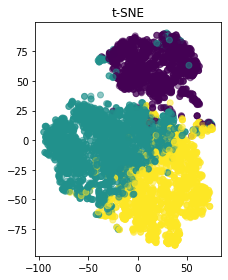

In [102]:
# Visualize t-SNE results
plt.subplot(1, 2, 2)
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title("t-SNE")
plt.tight_layout()
plt.show()

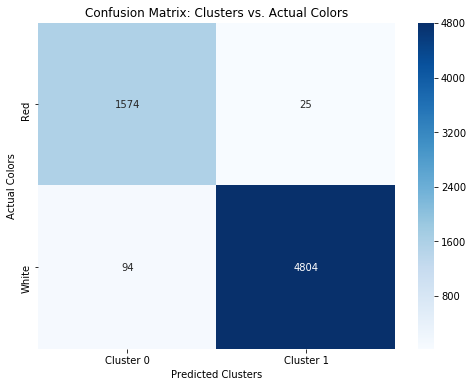

In [106]:
label_mapping = {"red": 0, "white": 1}
labels_numeric = labels.map(label_mapping)

from sklearn.metrics import confusion_matrix

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)

# Create a confusion matrix
confusion = confusion_matrix(labels_numeric, cluster_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["Red", "White"])
plt.xlabel("Predicted Clusters")
plt.ylabel("Actual Colors")
plt.title("Confusion Matrix: Clusters vs. Actual Colors")
plt.show()

### Conclusion : 
###### 1.) K-means Clustering Algorithm : 
K-Means clustering confirms the presence of clear clusters that align well with wine colors.It is giving unbalanced result as its biased towards red color.It's possible that the chemical properties of red wines are more separable in the reduced-dimensional space created by K-Means, leading to better clustering of red wines. The cluster assignments align well with the wine colors (red and white), suggesting that the algorithm can separate wines based on chemical properties.The separation between the two clusters implies that chemical properties contribute significantly to the color differentiation.
###### 2.) PCA :
It is naturally clustering into separate groups based on color.Three distinct clusters of colors, it implies that there might be more than just two primary groups or categories. It's possible that the third cluster could represent different quality levels within red and white wines. Each cluster might represent a different level of consistency in terms of chemical composition.
###### 3.) In supervised learning, PCA can be used to perform regression models using the principal component scores as features.
###### 4.) t-SNE : 
It is particularly useful for visualizing complex non-linear relationships in high-dimensional data.t-SNE visualization enhances our understanding of how the chemical properties group together to form distinct clusters.The unequal sizes of different color clusters in graph could correspond to different subcategories or varieties within each of the main wine colors. For example, within red wine, there could be different types or varieties that share some chemical properties but differ in others.This could indicate that there's a spectrum of properties within each color category.
